In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\excelr assignments\clustering\crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
std_df = scaler.fit_transform(df)

Kmeans

In [12]:
from sklearn.cluster import KMeans


In [15]:
from sklearn.metrics import silhouette_score
list1 = [2,3,4,5,6,7,8,9,10,11]
for i in list1:
    c1 = KMeans(n_clusters=i)
    c_labels = c1.fit_predict(std_df)
    s_score= silhouette_score(std_df,c_labels)
    print('clusters=',i,'silhoutte_score=',s_score)

clusters= 2 silhoutte_score= 0.4084890326217641
clusters= 3 silhoutte_score= 0.3095091512791688
clusters= 4 silhoutte_score= 0.33968891433344395
clusters= 5 silhoutte_score= 0.31063184240446945
clusters= 6 silhoutte_score= 0.27311470124093373
clusters= 7 silhoutte_score= 0.2935174020245671
clusters= 8 silhoutte_score= 0.26135356563109335
clusters= 9 silhoutte_score= 0.26896527339803095
clusters= 10 silhoutte_score= 0.2627607809395065
clusters= 11 silhoutte_score= 0.26920004035743417


C:\Users\lokit\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

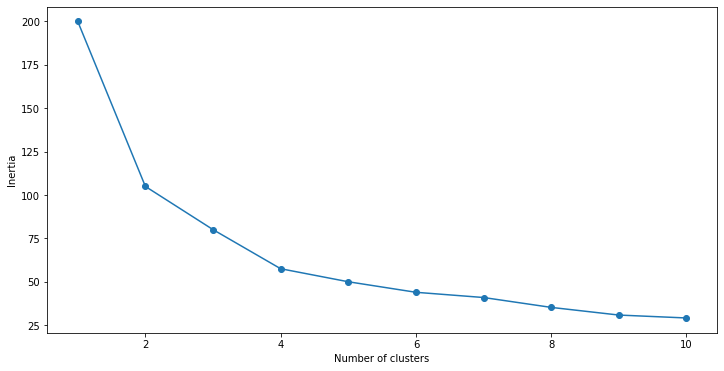

In [17]:
SSE = []
for cluster in range(1,11):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(std_df)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [18]:
#elbow curve shows a bent at 2 and 4 number of clusters but since silhoutte score is maximum for 2 number of clusters it fits the best

In [19]:
kmeans = KMeans( n_clusters = 2, init='k-means++')
kmeans.fit(std_df)
pred = kmeans.predict(std_df)

In [20]:
frame1 = pd.DataFrame(std_df)
frame1['cluster'] = pred
frame1['cluster'].value_counts()

0    30
1    20
Name: cluster, dtype: int64

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

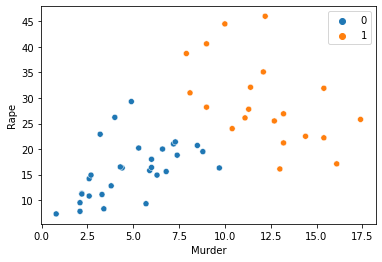

In [22]:
sns.scatterplot(x=df['Murder'], y = df['Rape'],hue = pred)

hierarchial

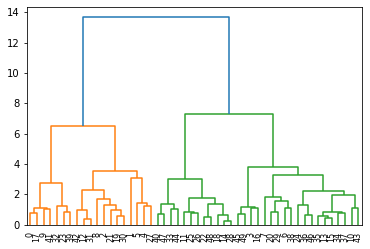

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(std_df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
list2 = [2,3,4,5,6,7,8,9,10,11]
for i in list2:
    hc = AgglomerativeClustering(n_clusters=i)
    c_labels1 = hc.fit_predict(std_df)
    s_score1= silhouette_score(std_df,c_labels1)
    print('clusters=',i,'silhoutte_score=',s_score1*100)

clusters= 2 silhoutte_score= 40.47944502519567
clusters= 3 silhoutte_score= 31.036358174027896
clusters= 4 silhoutte_score= 33.70187183556962
clusters= 5 silhoutte_score= 27.31109448720741
clusters= 6 silhoutte_score= 26.171267541168184
clusters= 7 silhoutte_score= 26.025035419230626
clusters= 8 silhoutte_score= 26.37495890512364
clusters= 9 silhoutte_score= 25.509615583635647
clusters= 10 silhoutte_score= 25.56049686435773
clusters= 11 silhoutte_score= 26.204317732891173


In [26]:
#silhoutte score is max for n_clusters=2

In [27]:
hc1 = AgglomerativeClustering(n_clusters=6)
pred2 = hc1.fit_predict(std_df)

In [28]:
frame2 = pd.DataFrame(std_df)
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

0    15
2    12
5     8
3     7
1     4
4     4
Name: cluster, dtype: int64

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

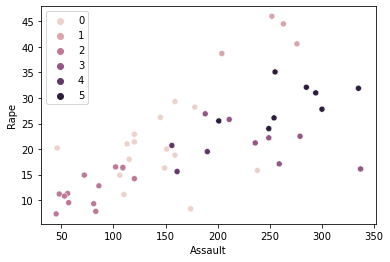

In [30]:
sns.scatterplot(x=df['Assault'], y = df['Rape'],hue = pred2)

dbscan


In [31]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(std_df)

DBSCAN(eps=0.8, min_samples=6)

In [32]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(std_df)
distances, indices = nbrs.kneighbors(std_df)

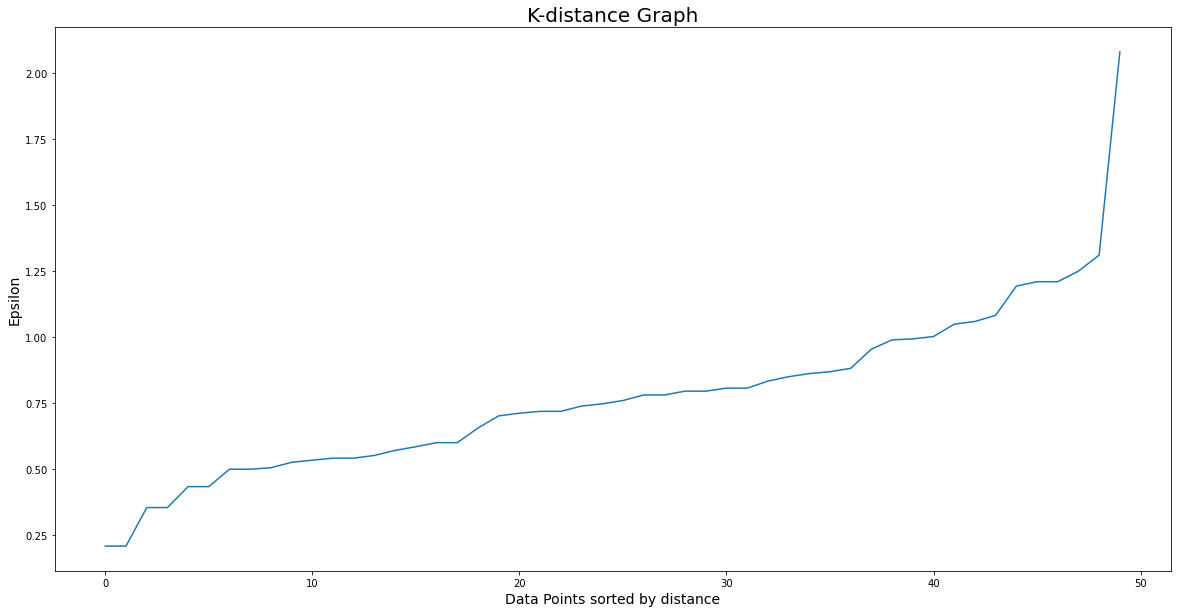

In [33]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [34]:
dbscan=DBSCAN(eps=1.25,min_samples=6)
dbscan.fit(std_df)

DBSCAN(eps=1.25, min_samples=6)

In [35]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

 1    32
-1    12
 0     6
Name: DBSCAN_opt_labels, dtype: int64

In [36]:
dbscan.labels_

array([-1, -1,  0,  1, -1, -1,  1,  1, -1, -1,  1,  1,  0,  1,  1,  1,  1,
       -1,  1,  0,  1,  0,  1, -1,  1,  1,  1, -1,  1,  1,  0,  0, -1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

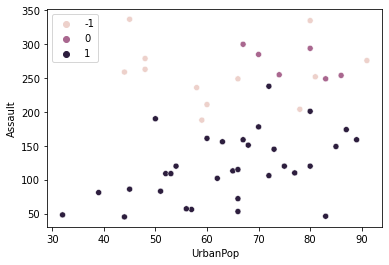

In [39]:
sns.scatterplot(x=df['UrbanPop'],y=df['Assault'],hue=dbscan.labels_)